In [9]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
import numpy as np # linear algebra
import os # accessing directory structure


%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings('ignore')

# Load Data

In [10]:
tele_churn_df = pd.read_csv("telecom_churn_data.csv", encoding = "ISO-8859-1", low_memory=False )
tele_churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,...,0,1.00,1.00,1.00,nan,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.05,...,0,nan,1.00,1.00,nan,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.69,...,0,nan,nan,nan,1.00,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.34,...,0,nan,nan,nan,nan,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.64,...,0,0.00,nan,nan,nan,1526,0.00,0.00,0.00,0.00


In [11]:
tele_churn_df.shape

(99999, 226)

In [12]:
tele_churn_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.00,99999.00,98981.00,98981.00,98981.00,99999.00,99999.00,99999.00,99999.00,96062.00,...,99999.00,25153.00,25571.00,26339.00,25922.00,99999.00,99999.00,99999.00,99999.00,99999.00
mean,7001207270.39,109.00,0.00,0.00,0.00,282.99,278.54,279.15,261.65,132.40,...,0.08,0.91,0.91,0.89,0.86,1219.85,68.17,66.84,60.02,3.30
std,695669.39,0.00,0.00,0.00,0.00,328.44,338.16,344.47,342.00,297.21,...,0.65,0.28,0.29,0.31,0.35,954.73,267.58,271.20,253.94,32.41
min,7000000074.00,109.00,0.00,0.00,0.00,-2258.71,-2014.05,-945.81,-1899.51,0.00,...,0.00,0.00,0.00,0.00,0.00,180.00,0.00,0.00,0.00,0.00
25%,7000606232.50,109.00,0.00,0.00,0.00,93.41,86.98,84.13,62.69,7.38,...,0.00,1.00,1.00,1.00,1.00,467.00,0.00,0.00,0.00,0.00
50%,7001204632.00,109.00,0.00,0.00,0.00,197.70,191.64,192.08,176.85,34.31,...,0.00,1.00,1.00,1.00,1.00,863.00,0.00,0.00,0.00,0.00
75%,7001812030.50,109.00,0.00,0.00,0.00,371.06,365.34,369.37,353.47,118.74,...,0.00,1.00,1.00,1.00,1.00,1807.50,0.00,0.00,0.00,0.00
max,7002410905.00,109.00,0.00,0.00,0.00,27731.09,35145.83,33543.62,38805.62,7376.71,...,49.00,1.00,1.00,1.00,1.00,4337.00,12916.22,9165.60,11166.21,2618.57


# Data Cleaning & EDA

### Filter High Value Customer 

In [13]:
#Find columns with recharge info
#since total recharge amount is to be used for High Value Customer Filter
tot_rech_cols = [col for col in tele_churn_df.columns if 'total_rech_' in col]
print(tot_rech_cols)

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9']


#### Derive Total Data Recharge Amounts

In [14]:
tele_churn_df["total_rech_data_amt_6"] = tele_churn_df["total_rech_data_6"]  * tele_churn_df['av_rech_amt_data_6']
tele_churn_df["total_rech_data_amt_7"] = tele_churn_df["total_rech_data_7"]  * tele_churn_df['av_rech_amt_data_7']
tele_churn_df["total_rech_data_amt_8"] = tele_churn_df["total_rech_data_8"]  * tele_churn_df['av_rech_amt_data_8']
tele_churn_df["total_rech_data_amt_9"] = tele_churn_df["total_rech_data_9"]  * tele_churn_df['av_rech_amt_data_9']

#### Drop total_rech_data_* and av_rech_amt_data_*

In [15]:
drop_col = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
tele_churn_df.drop(drop_col, axis=1, inplace=True)

#### Average of Recharge Amount in 6th and 7th Month

In [16]:
av_rech_amt_6n7 = (tele_churn_df["total_rech_amt_6"].fillna(0) + tele_churn_df["total_rech_data_amt_6"].fillna(0) + 
tele_churn_df["total_rech_amt_7"].fillna(0) + tele_churn_df["total_rech_data_amt_7"].fillna(0))/2.0

#### 70th Percentile of Avg Recharge Amount

In [17]:
pc70_6n7 = np.percentile(av_rech_amt_6n7, 70.0)
print('70 percentile of 6th and 7th months avg recharge amount: ', pc70_6n7)

70 percentile of 6th and 7th months avg recharge amount:  478.0


In [18]:
data_highval_cust = tele_churn_df[av_rech_amt_6n7 >= pc70_6n7]
print('Dataframe Shape after Filtering HIgh Value Customers: ', data_highval_cust.shape)

Dataframe Shape after Filtering HIgh Value Customers:  (30001, 222)


#### List of columns with only 1 unqiue value

In [19]:
col_list = data_highval_cust.loc[:,data_highval_cust.apply(pd.Series.nunique) == 1]
col_list.head(5)

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9
0,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,nan,nan,0.00,nan,nan,nan,0.00,nan
7,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.00,0.00,0.00,nan,0.00,0.00,0.00,nan
8,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
21,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
23,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


#### Remove Columns with only 1 unique value

In [20]:
data_highval_cust = data_highval_cust.loc[:,data_highval_cust.apply(pd.Series.nunique) != 1]
data_highval_cust.shape

(30001, 206)

#### Rename Columns with Meaningful Names

In [21]:
data_highval_cust.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

#### Check Columns that can be changed to integers, floats or other data types

In [22]:
print(data_highval_cust.select_dtypes(include=['object']).columns)

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')


#### convert datetime columns from object type

In [23]:
for col in data_highval_cust.select_dtypes(include=['object']).columns:
    data_highval_cust[col] = pd.to_datetime(data_highval_cust[col])

data_highval_cust.shape

(30001, 206)

#### Drop Columns with > 30% of missing values except for 9th Month

In [24]:
columns = data_highval_cust.columns
percent_missing = data_highval_cust.isnull().sum() * 100 / len(data_highval_cust)
missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})
drop_col = missing_value_df.loc[(missing_value_df["column_name"].str.contains('_9')==False) & (missing_value_df["percent_missing"] > 30.0)]["column_name"]
drop_col

date_of_last_rech_data_6    date_of_last_rech_data_6
date_of_last_rech_data_7    date_of_last_rech_data_7
date_of_last_rech_data_8    date_of_last_rech_data_8
max_rech_data_6                      max_rech_data_6
max_rech_data_7                      max_rech_data_7
max_rech_data_8                      max_rech_data_8
count_rech_2g_6                      count_rech_2g_6
count_rech_2g_7                      count_rech_2g_7
count_rech_2g_8                      count_rech_2g_8
count_rech_3g_6                      count_rech_3g_6
count_rech_3g_7                      count_rech_3g_7
count_rech_3g_8                      count_rech_3g_8
arpu_3g_6                                  arpu_3g_6
arpu_3g_7                                  arpu_3g_7
arpu_3g_8                                  arpu_3g_8
arpu_2g_6                                  arpu_2g_6
arpu_2g_7                                  arpu_2g_7
arpu_2g_8                                  arpu_2g_8
night_pck_user_6                    night_pck_

In [25]:
data_highval_cust.drop(drop_col, axis=1, inplace=True)
data_highval_cust.shape

(30001, 179)

#### Drop Rows with all Null Values

In [26]:
data_highval_cust = data_highval_cust.dropna(how='all',axis=0) 
data_highval_cust.shape

(30001, 179)

#### Find Highly correlated data and drop Highly Correlated Columns

In [27]:
cor = data_highval_cust.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.60) | (cor < -0.60)].sort_values()

monthly_3g_6        vol_3g_mb_6        0.60
total_ic_mou_7      loc_ic_t2t_mou_7   0.60
arpu_2g_9           count_rech_3g_9    0.60
total_og_mou_8      onnet_mou_9        0.60
total_rech_amt_8    arpu_6             0.60
roam_og_mou_8       roam_og_mou_7      0.60
offnet_mou_8        offnet_mou_6       0.60
total_ic_mou_8      loc_ic_t2t_mou_8   0.61
std_ic_mou_6        std_ic_t2m_mou_7   0.61
std_og_mou_9        std_og_t2m_mou_8   0.61
arpu_2g_9           vol_3g_mb_8        0.61
std_ic_mou_7        std_ic_t2m_mou_8   0.61
loc_og_mou_6        loc_og_t2t_mou_7   0.61
vbc_3g_8            vol_3g_mb_8        0.61
std_og_mou_8        std_og_t2m_mou_9   0.61
std_og_mou_9        offnet_mou_9       0.61
total_rech_amt_8    total_rech_amt_6   0.61
total_og_mou_6      std_og_t2t_mou_6   0.61
total_rech_amt_6    arpu_8             0.61
std_og_mou_7        std_og_t2t_mou_8   0.61
roam_ic_mou_8       roam_ic_mou_7      0.61
monthly_3g_7        monthly_3g_6       0.61
last_day_rch_amt_7  max_rech_amt

In [28]:
drop_col_list = ['loc_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2t_mou_9','std_og_t2m_mou_6',
                'std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2m_mou_9','total_og_mou_6','total_og_mou_7','total_og_mou_8',
                'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2t_mou_9','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2m_mou_9',
                'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2m_mou_9','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9','arpu_2g_9','count_rech_2g_9','count_rech_3g_9','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
                'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2t_mou_9','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2f_mou_9',
                'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2m_mou_9','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_t2f_mou_9',
                'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
                 
data_highval_cust.drop(drop_col_list, axis=1, inplace=True)
data_highval_cust.shape

(30001, 124)

## Checking for Outliers

#### Finding continuous variables

In [29]:
data_highval_cust.describe().columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'sachet_3g_9', 'fb_user_9', 'aon',
       'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6', 'vbc_3g_9',
       'total_rech_data_amt_9'],
      dtype='object', length=122)

In [30]:
con_var = data_highval_cust.describe().columns

#### Checking outliers at 25%,50%,75%,90%,95% and 99%

In [31]:
data_highval_cust[con_var].describe(percentiles=[.25,.5,.75,.90,.95,.99])

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_rech_data_amt_9
count,30001.00,30001.00,30001.00,30001.00,30001.00,29456.00,29464.00,28827.00,28100.00,29456.00,...,30001.00,30001.00,30001.00,15220.00,30001.00,30001.00,30001.00,30001.00,30001.00,15220.00
mean,7001206159.56,558.49,560.78,508.60,467.12,265.62,272.70,243.65,225.80,380.61,...,0.23,0.20,0.19,0.89,1209.37,169.14,178.87,158.52,8.03,747.35
std,690878.42,460.64,479.78,501.96,501.57,462.49,482.97,465.20,447.20,484.26,...,1.09,1.10,1.05,0.31,957.68,420.97,443.54,416.73,52.38,2139.48
min,7000000074.00,-2258.71,-2014.05,-945.81,-1899.51,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,180.00,0.00,0.00,0.00,0.00,1.00
25%,7000609293.00,309.87,309.83,231.47,189.61,19.24,18.16,14.25,11.43,78.58,...,0.00,0.00,0.00,1.00,460.00,0.00,0.00,0.00,0.00,154.00
50%,7001203434.00,481.69,480.94,427.58,387.82,88.06,86.88,72.93,65.34,229.63,...,0.00,0.00,0.00,1.00,846.00,0.00,0.00,0.00,0.00,252.00
75%,7001803773.00,699.94,698.32,661.49,626.16,297.42,298.09,255.02,229.85,494.78,...,0.00,0.00,0.00,1.00,1756.00,128.80,137.29,98.44,0.00,772.00
90%,7002165290.00,994.10,995.86,977.35,935.20,764.82,794.98,685.24,635.89,906.83,...,1.00,0.00,0.00,1.00,2793.00,580.68,611.31,532.61,0.90,1668.00
95%,7002285218.00,1240.96,1261.27,1255.02,1204.05,1145.16,1198.38,1097.42,1022.98,1266.19,...,1.00,1.00,1.00,1.00,3140.00,938.56,984.93,885.24,31.31,2520.00
99%,7002385520.00,1985.12,1999.50,1986.62,1952.98,2162.96,2216.53,2187.49,2138.00,2341.01,...,5.00,4.00,4.00,1.00,3651.00,1965.00,2066.44,1946.29,202.18,6631.09


## Find Churners

In [32]:
data_highval_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00
8,34.91,142.18,0.00,0.00
21,252.61,1031.53,0.00,0.00
23,127.48,127.63,13.93,314.74


#### churned customers (churn=1, else 0) 

In [33]:
data_highval_cust['churn'] = np.where(data_highval_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0,1,0)

In [34]:
data_highval_cust['churn'].head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int32

#### Remove All 9th Month related columns

In [35]:
drop_cols = [col for col in data_highval_cust.columns if '_9' in col]
print(drop_cols)

data_highval_cust.drop(drop_cols, axis=1, inplace=True)

data_highval_cust.shape

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'max_rech_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'vbc_3g_9', 'total_rech_data_amt_9']


(30001, 87)

#### Checking for Missing Values and Inputing Them using IterativeImpute

In [36]:
#data_highval_cust.isnull().sum()

In [37]:
#col = data_highval_cust.select_dtypes(np.number).columns

In [38]:
#col

In [39]:
#from sklearn.experimental import enable_iterative_imputer
#from sklearn.impute import IterativeImputer

In [40]:
#imp = IterativeImputer(missing_values = np.nan, sample_posterior = False, max_iter = 10,tol = 0.001, n_nearest_features = 4, initial_strategy = 'median')

In [41]:
#imp.fit(data_highval_cust[col])
#data = pd.DataFrame(data = imp.transform(data_highval_cust[col]),columns = col, dtype = np.number)

In [42]:
#data.isnull().sum()

In [43]:
#data.shape

In [44]:
#data_highval_cust[data_highval_cust.isnull()].head()

In [45]:
#data_highval_cust.shape

#### Distribution plot

In [7]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

#### Correlation matrix

In [8]:
def plotCorrelationMatrix(df, graphWidth):
    filename = "Telecom Churn"
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

#### Scatter and density plots

In [40]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

#### Distribution graphs (histogram/bar graph) of sampled columns

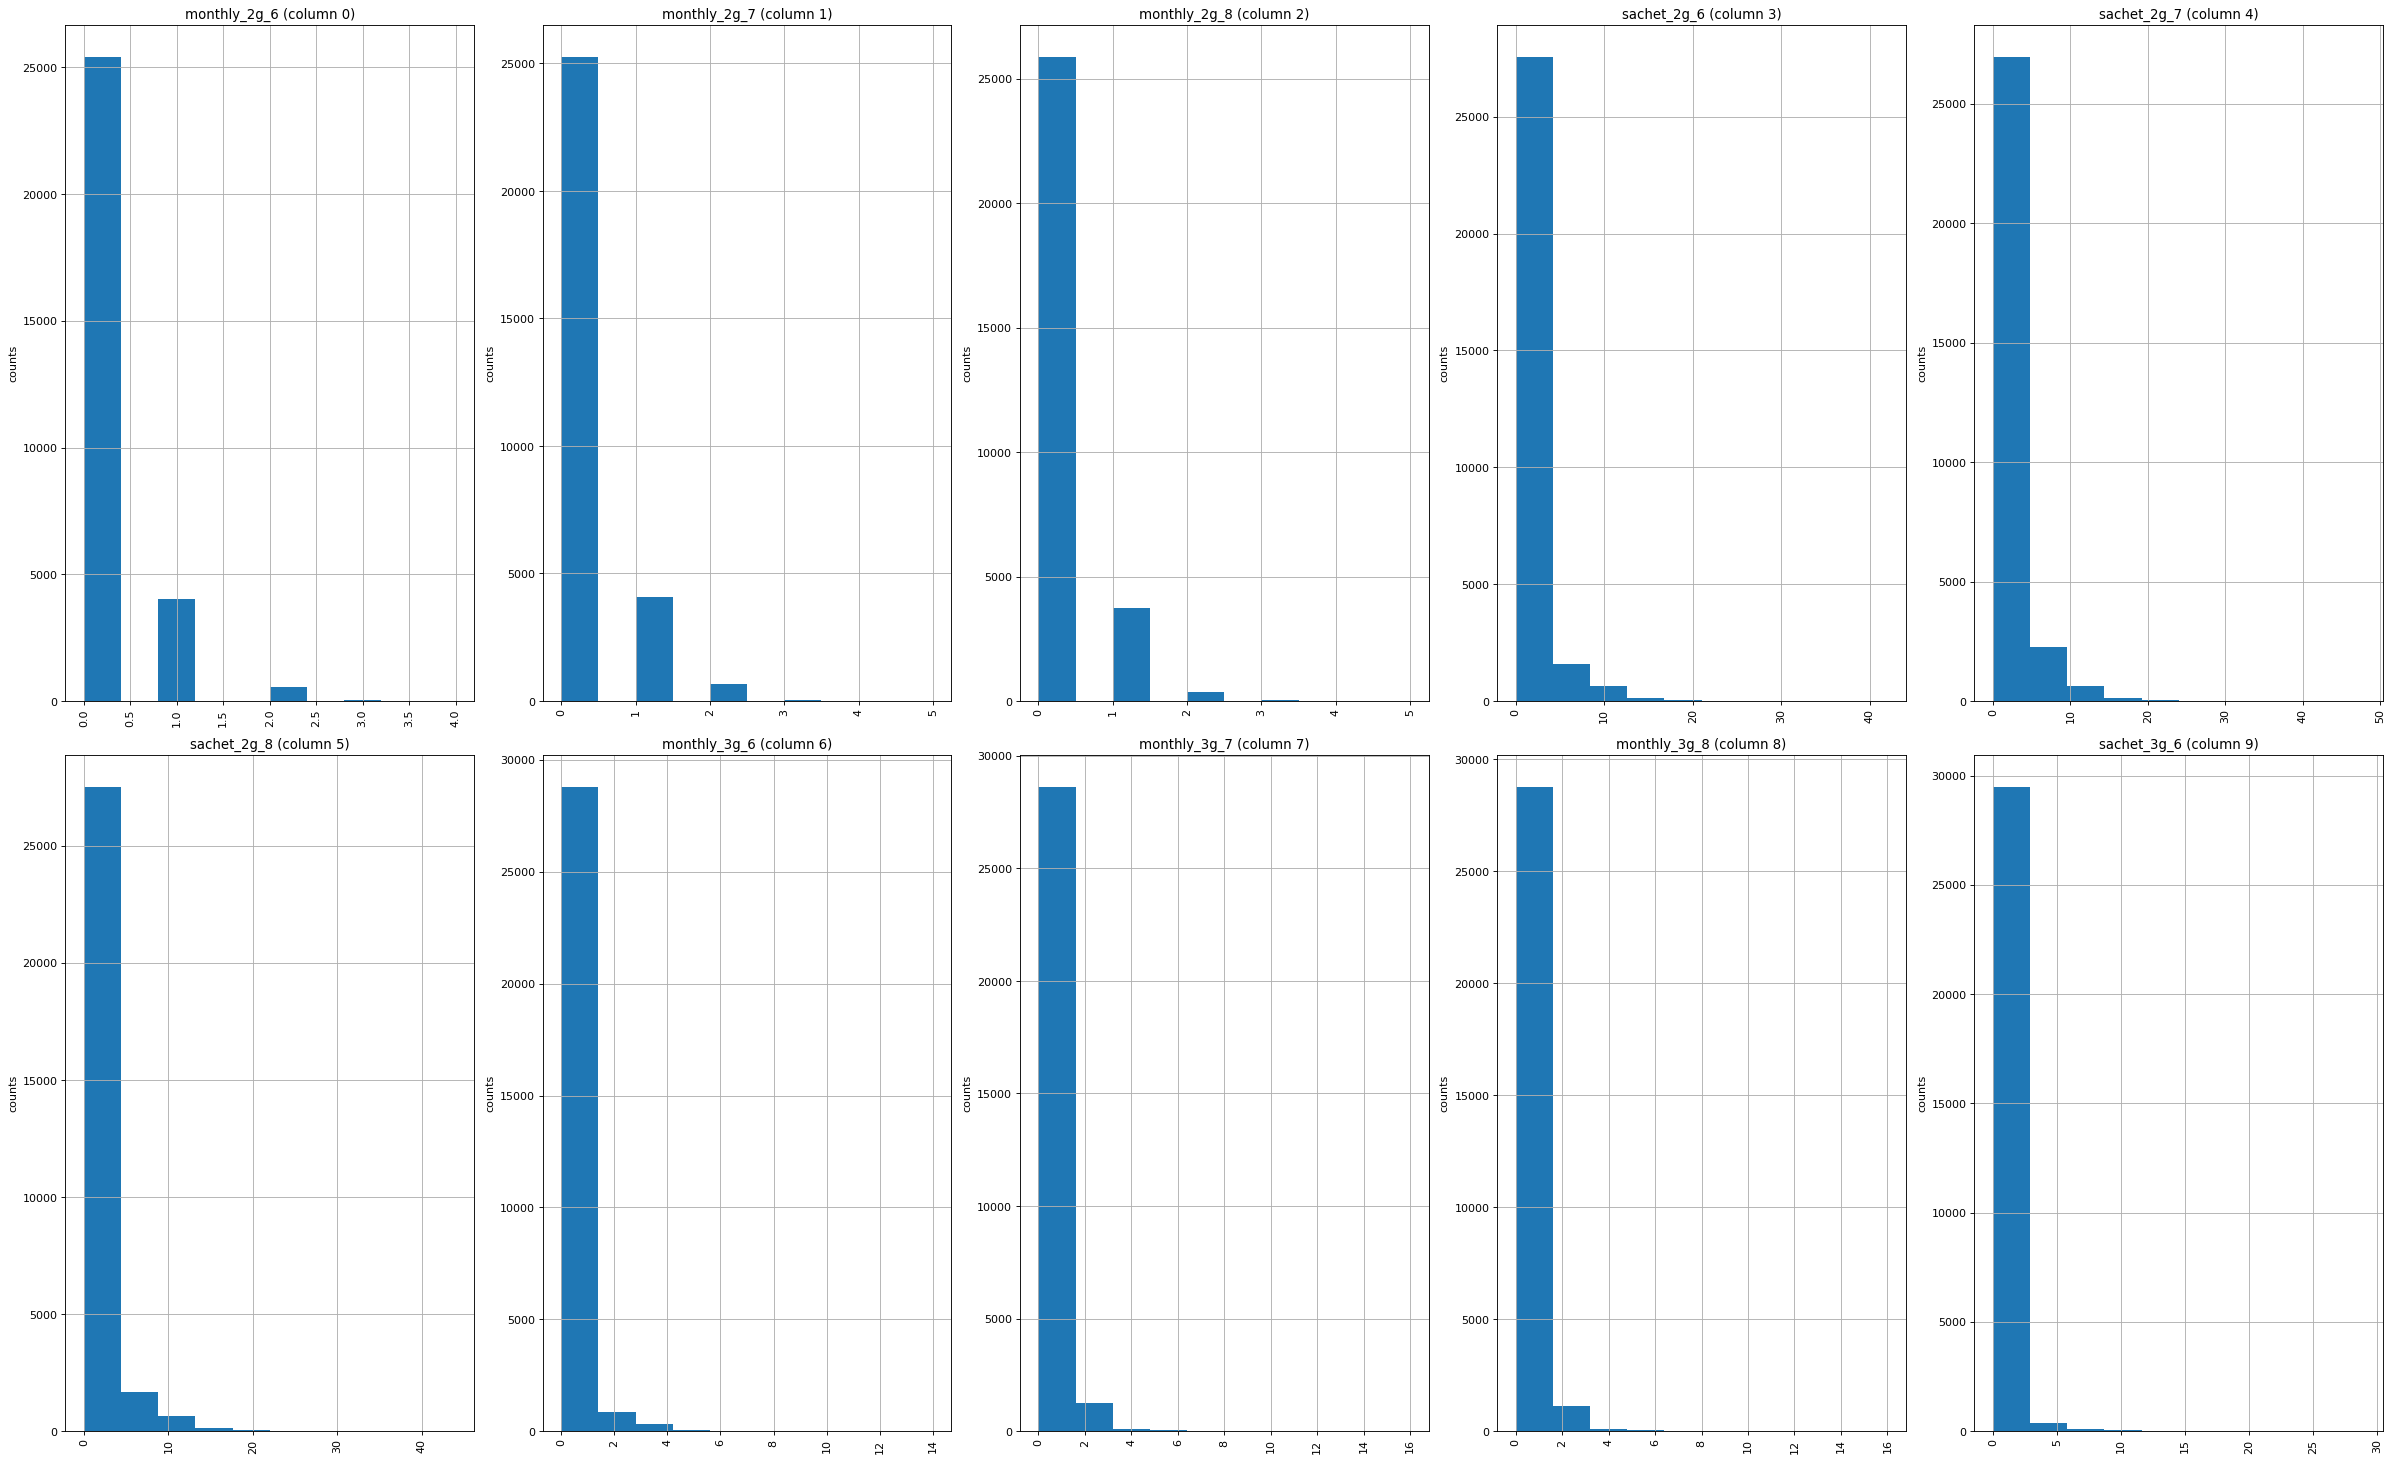

In [41]:
plotPerColumnDistribution(data_highval_cust, 10, 5)

#### Heat map for Correlation

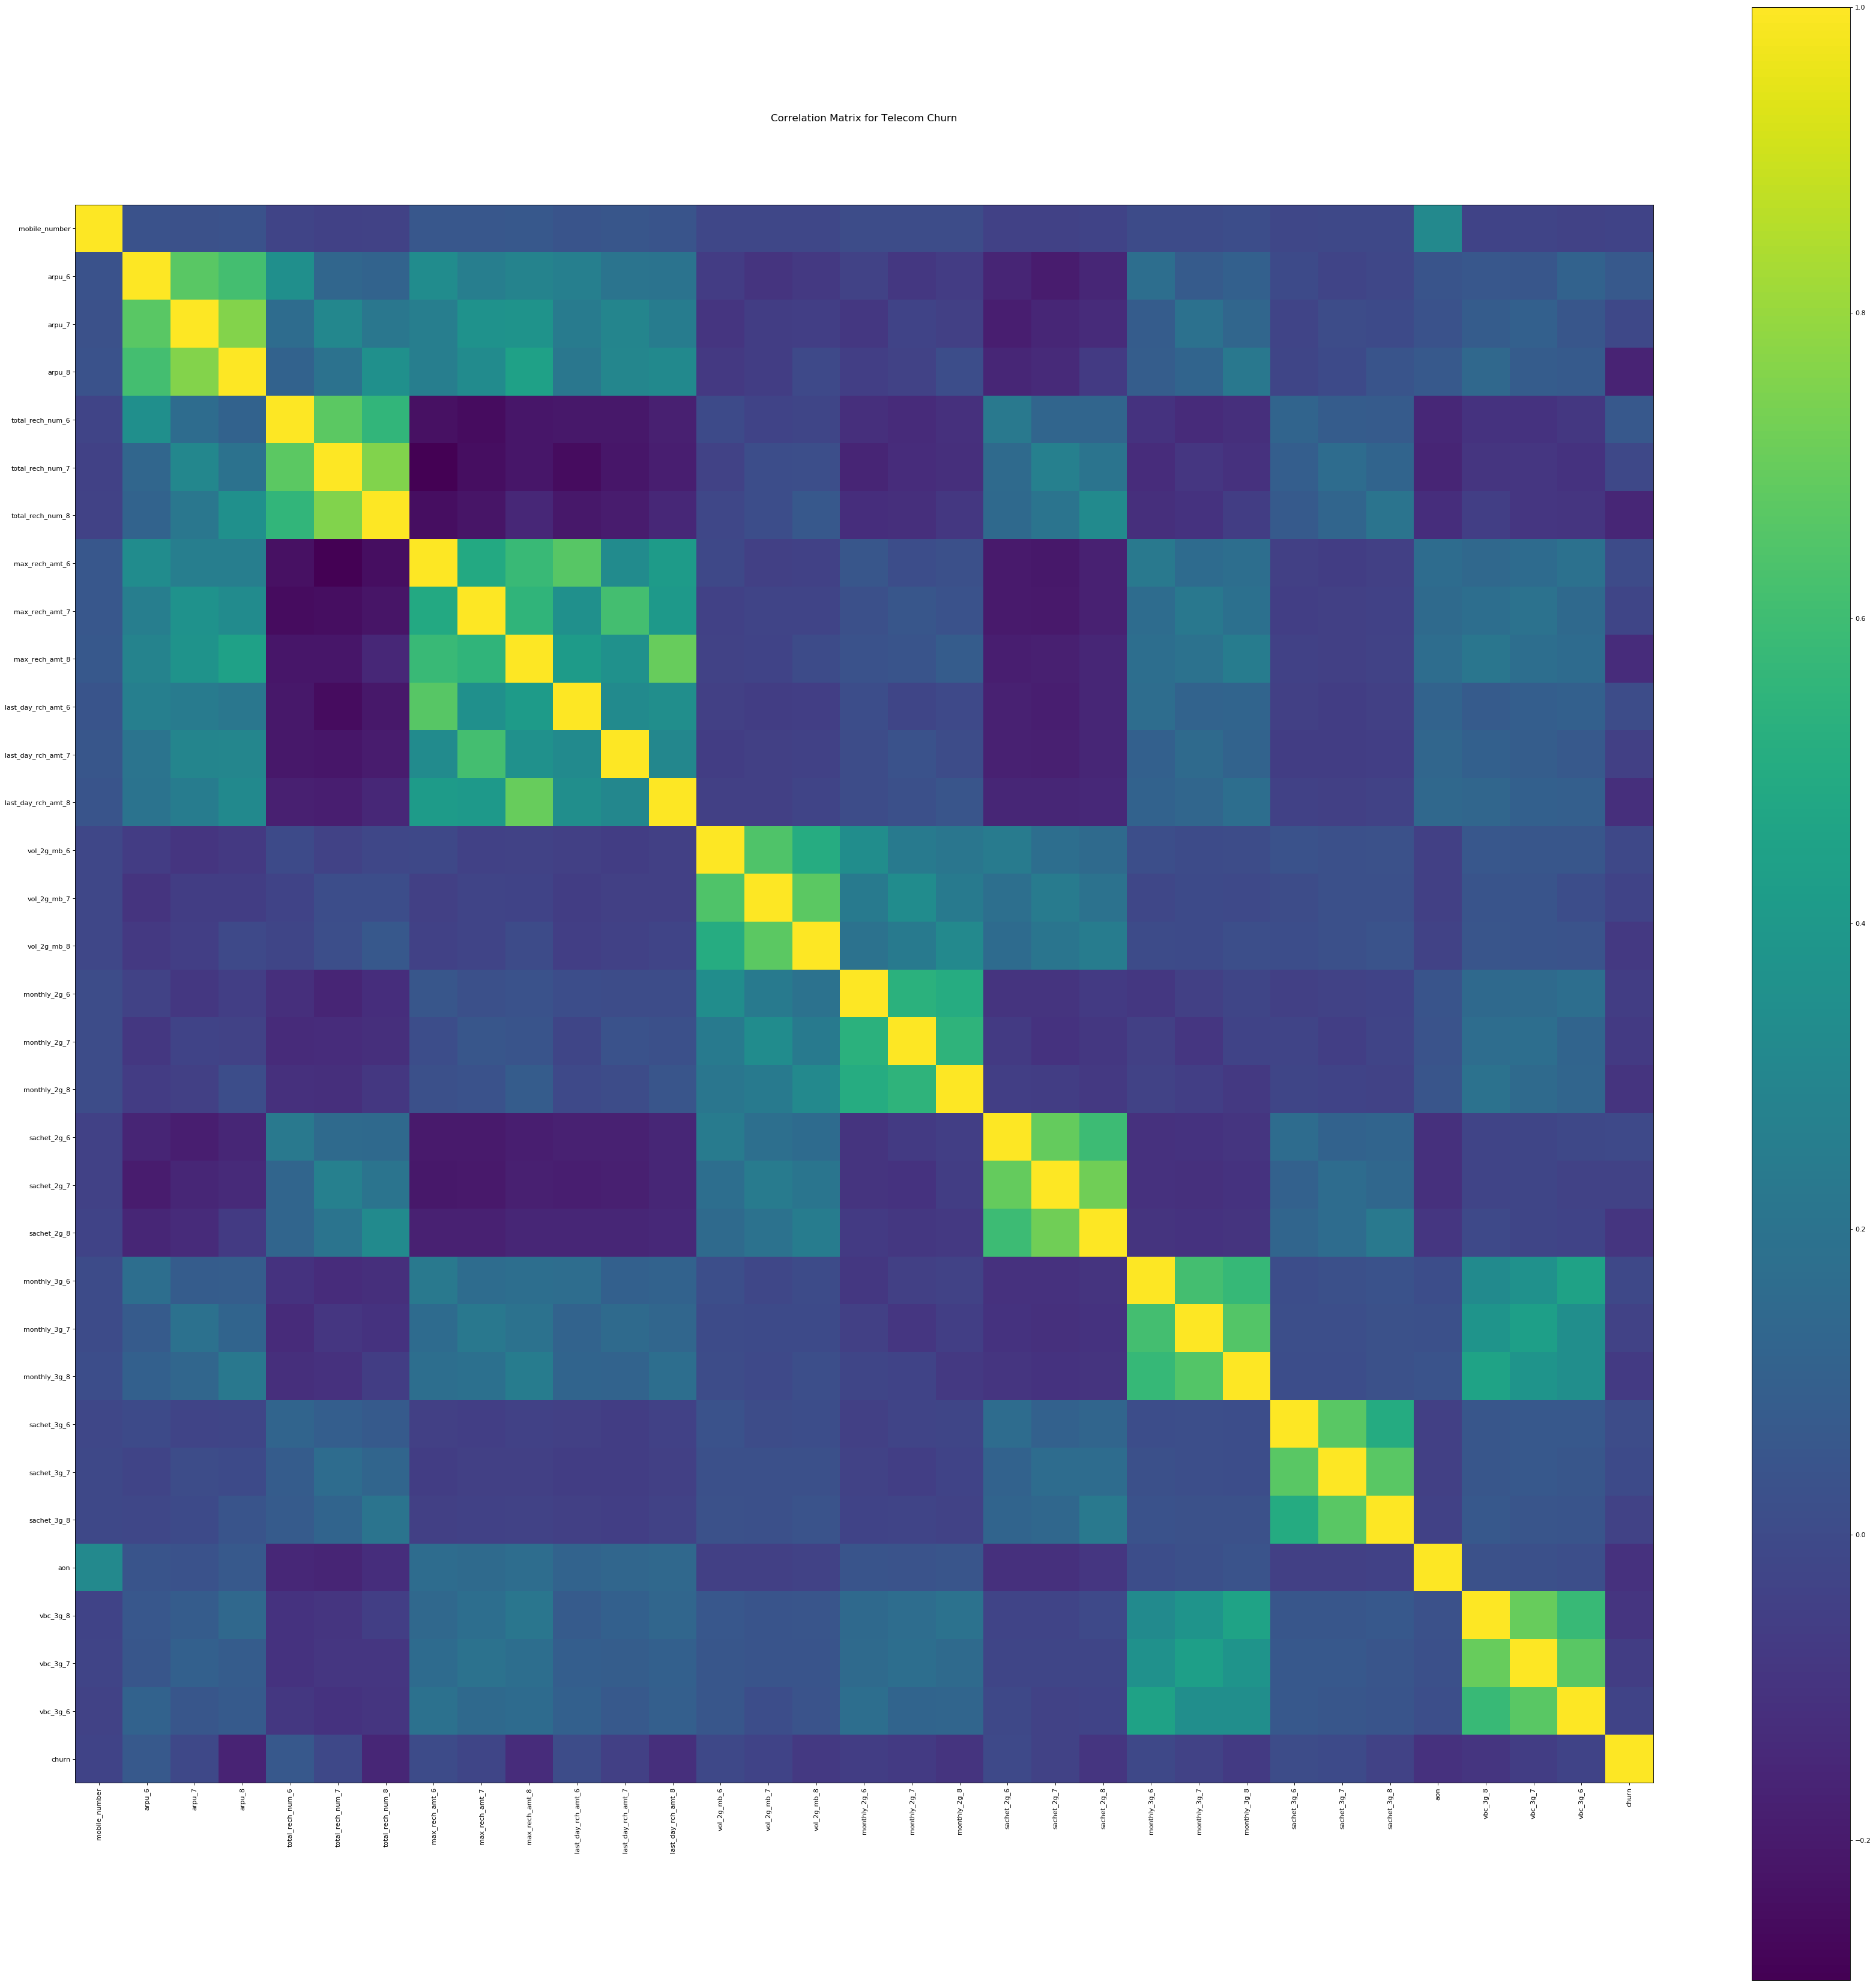

In [42]:
plotCorrelationMatrix(data_highval_cust, 53)

#### Scatter and density plots:

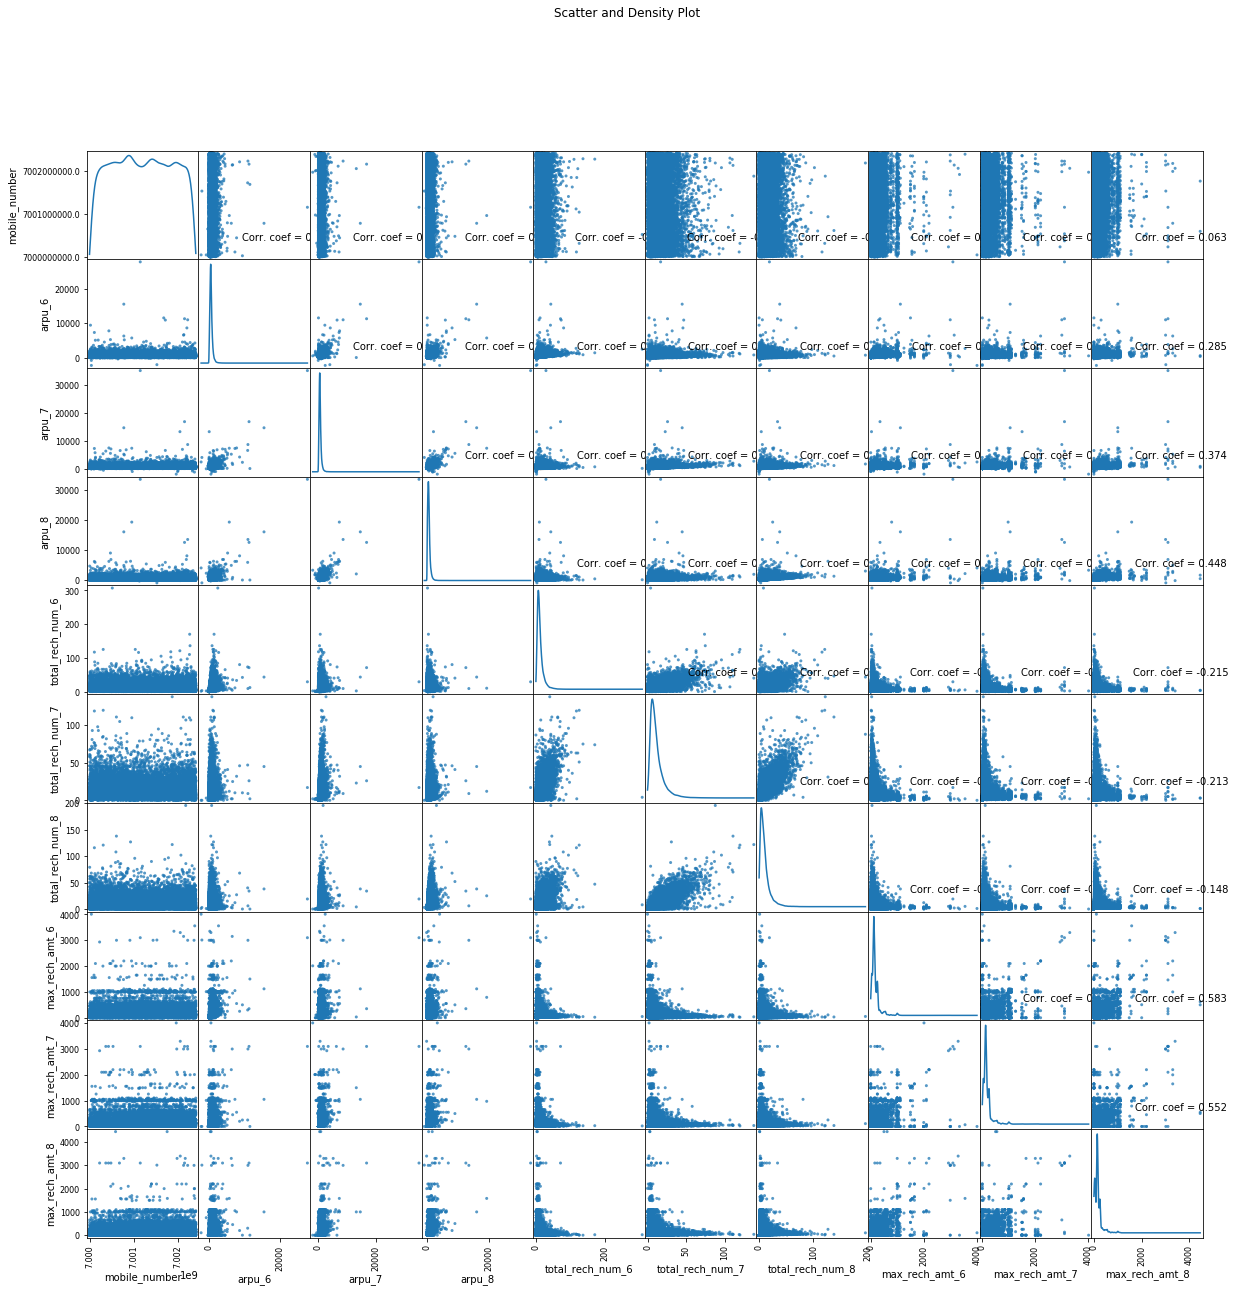

In [43]:
plotScatterMatrix(data_highval_cust, 20, 10)

In [44]:
col_list = data_highval_cust.filter(regex='_6|_7').columns.str[:-2]
col_list.unique()

print (data_highval_cust.shape)

for idx, col in enumerate(col_list.unique()):
    print(col)
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    data_highval_cust[avg_col_name] = (data_highval_cust[col_6]  + data_highval_cust[col_7])/ 2

(30001, 87)
arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2c_mou
loc_og_mou
std_og_t2f_mou
std_og_mou
isd_og_mou
spl_og_mou
og_others
loc_ic_mou
std_ic_t2t_mou
std_ic_t2f_mou
std_ic_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
max_rech_amt
last_day_rch_amt
vol_2g_mb
monthly_2g
sachet_2g
monthly_3g
sachet_3g
vbc_3g


In [45]:
print (data_highval_cust.shape)

col_list = data_highval_cust.filter(regex='_6|_7').columns

data_highval_cust.drop(col_list, axis=1, inplace=True)
data_highval_cust.shape

(30001, 115)


(30001, 59)

In [46]:
data_highval_cust.head()

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,...,avg_ic_others_av67,avg_total_rech_num_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67
0,7000842753,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,nan,3.50,252.00,252.00,15.72,0.00,0.00,1.00,0.00,50.60
7,7000701601,3171.48,52.29,325.91,31.64,38.06,0.00,255.79,16.68,77.84,...,15.46,5.00,1185.00,0.00,0.00,0.00,0.00,0.00,0.00,19.06
8,7001524846,137.36,35.08,136.48,0.00,0.00,7.15,63.04,0.00,98.28,...,0.00,20.00,122.00,25.00,178.00,0.50,0.50,0.00,0.00,516.40
21,7002124215,637.76,85.14,983.39,0.00,0.00,0.00,129.74,0.00,938.79,...,0.00,24.00,50.00,25.00,0.00,0.00,0.00,0.00,0.00,0.00
23,7000887461,366.97,33.58,205.89,0.00,0.00,17.71,182.14,0.00,39.61,...,2.67,4.00,89.50,89.50,0.24,0.00,0.00,1.00,0.00,25.93


#### Convert AON in Months

In [47]:
data_highval_cust['aon_mon'] = data_highval_cust['aon']/30
data_highval_cust.drop('aon', axis=1, inplace=True)
data_highval_cust['aon_mon'].head()

0    32.27
7    26.73
8    10.50
21   24.00
23   20.13
Name: aon_mon, dtype: float64

#### Churn Distribution

Text(0.5, 1.0, 'Churn Distribution')

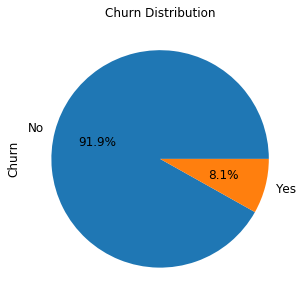

In [48]:
ax = (data_highval_cust['churn'].value_counts()*100.0 /len(data_highval_cust)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           

ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)

91.9% customers do not churn. 

Text(0.5, 1.0, 'Customers by their tenure')

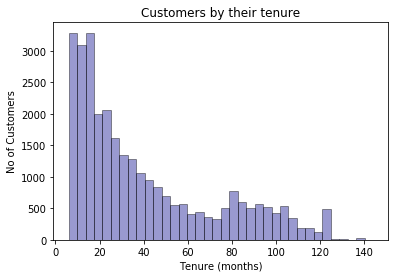

In [49]:
ax = sns.distplot(data_highval_cust['aon_mon'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('No of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Customers by their tenure')

In [50]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
data_highval_cust['tenure_range'] = pd.cut(data_highval_cust['aon_mon'], tn_range, labels=tn_label)
data_highval_cust['tenure_range'].head()

0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): [0-6 Months < 6-12 Months < 1-2 Yrs < 2-5 Yrs < 5 Yrs and above]

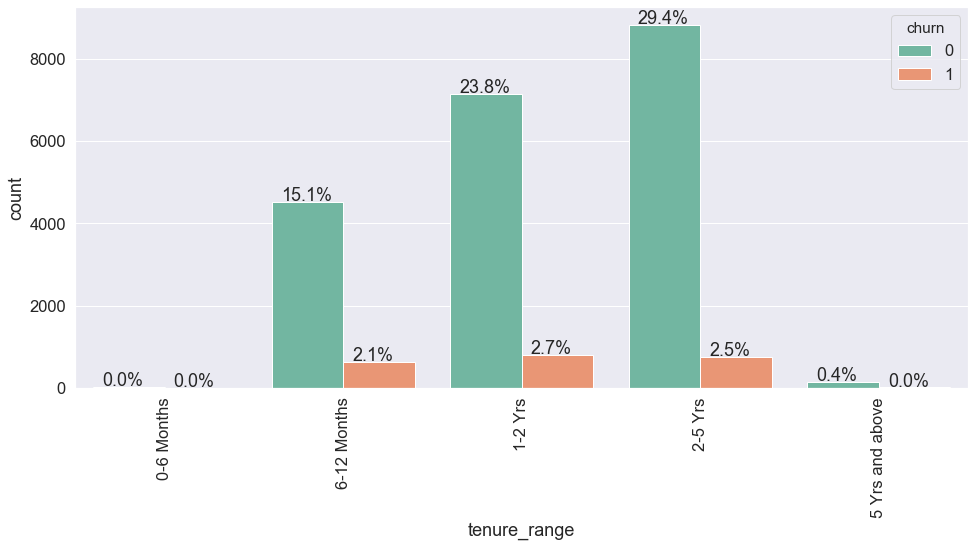

In [51]:
sns.set()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

temp = pd.Series(data = 'tenure_range')
fig, ax = plt.subplots()
width = len(data_highval_cust['tenure_range'].unique()) + 6 + 4*len(temp.unique())
fig.set_size_inches(width , 7)

total = float(len(data_highval_cust.index))
ax = sns.countplot(x="tenure_range", data=data_highval_cust, palette="Set2", hue = "churn");
for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(data_highval_cust))), (p.get_x()+0.05, p.get_height()+20))
plt.xticks(rotation=90)
plt.show()

#### Get Correlation of "Churn" with other variables

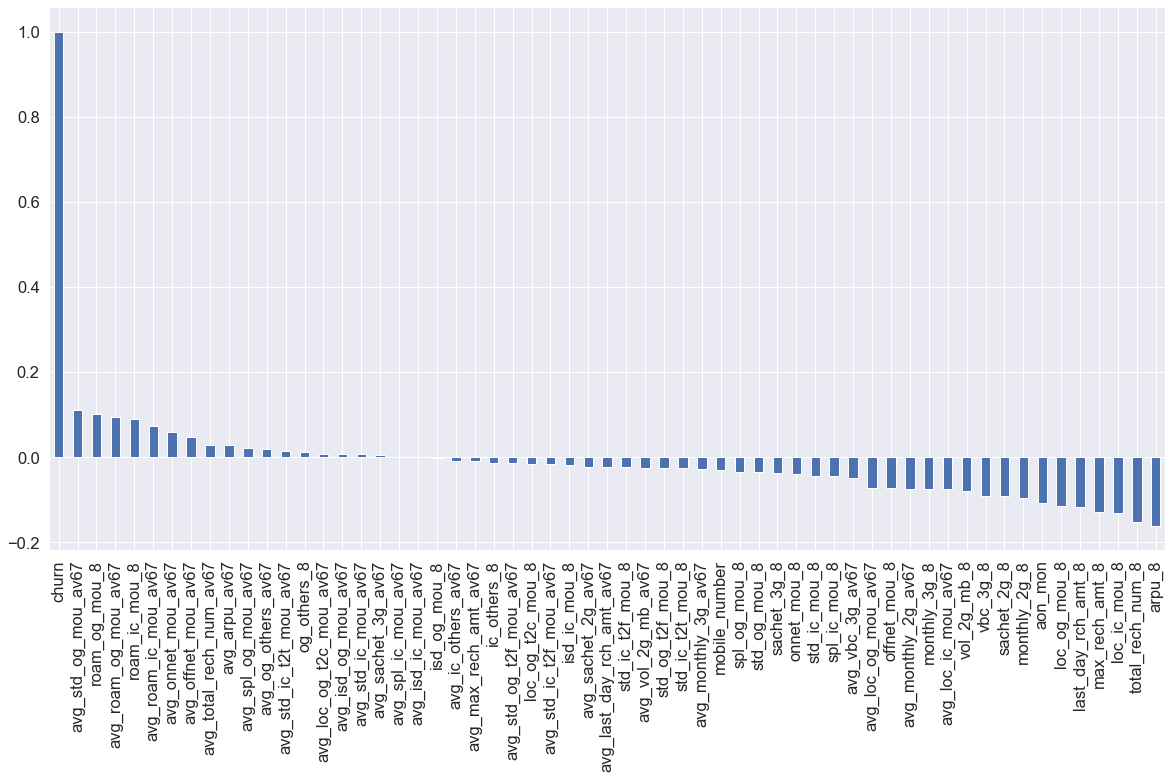

In [52]:
plt.figure(figsize=(20,10))
data_highval_cust.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

AVG STD outgoing calls for month 6 and 7 ,outgoing calls in roaming are highly correlated with churn.
Avg revenue, no of 8th month seemd negatively corerlated.

#### Churn VS Tenure

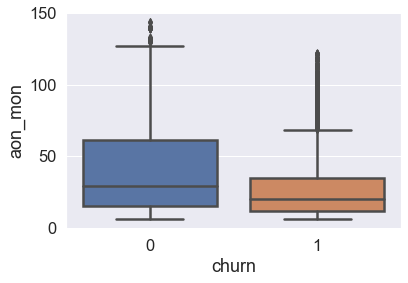

In [53]:
sns.boxplot(x = data_highval_cust.churn, y = data_highval_cust.aon_mon)

Customers who do not churn tend to stay longer.

#### Churn VS Recharge Amount

Text(0.5, 1.0, 'Distribution of Max Recharge Amount by churn')

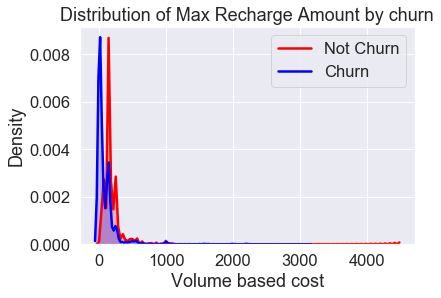

In [54]:
ax = sns.kdeplot(data_highval_cust.max_rech_amt_8[(data_highval_cust["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(data_highval_cust.max_rech_amt_8[(data_highval_cust["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')

People who recharge with less amount are more likely to churn

# Model Building

In [55]:
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from imblearn import under_sampling,over_sampling 
from imblearn.over_sampling import SMOTE

## a) Logistic with PCA

#### create new Dataset for modeling

In [56]:
Telecom_df = data_highval_cust[:].copy()

#### Dropping tenure_range since we have AON MONTH already and columns are highly coorelated

In [57]:
Telecom_df.drop('tenure_range', axis=1, inplace=True)
#Telecom_df.drop('mobile_number', axis=1, inplace=True)

#### Fill NaN with 0

In [58]:
Telecom_df.fillna(0, inplace=True)
Telecom_df.head()

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,...,avg_total_rech_num_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,aon_mon
0,7000842753,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3.50,252.00,252.00,15.72,0.00,0.00,1.00,0.00,50.60,32.27
7,7000701601,3171.48,52.29,325.91,31.64,38.06,0.00,255.79,16.68,77.84,...,5.00,1185.00,0.00,0.00,0.00,0.00,0.00,0.00,19.06,26.73
8,7001524846,137.36,35.08,136.48,0.00,0.00,7.15,63.04,0.00,98.28,...,20.00,122.00,25.00,178.00,0.50,0.50,0.00,0.00,516.40,10.50
21,7002124215,637.76,85.14,983.39,0.00,0.00,0.00,129.74,0.00,938.79,...,24.00,50.00,25.00,0.00,0.00,0.00,0.00,0.00,0.00,24.00
23,7000887461,366.97,33.58,205.89,0.00,0.00,17.71,182.14,0.00,39.61,...,4.00,89.50,89.50,0.24,0.00,0.00,1.00,0.00,25.93,20.13


#### split into X and y

In [59]:
X = Telecom_df.drop(['churn','mobile_number'], axis=1)
y = Telecom_df[['churn','mobile_number']]

Telecom_df.drop(['churn','mobile_number'], axis=1, inplace=True)

#### Feature Scaling

In [60]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

#### Split in train & Test

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

#### Checking imbalance in test and train dataset

In [62]:
print("X_train Shape : ", X_train.shape)
print("X_test Shape : ", X_test.shape)

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data : ", y_train_imb)
print("Imbalance in Test Data : ", y_test_imb)

X_train Shape :  (21000, 57)
X_test Shape :  (9001, 57)
Imbalance in Train Data :  churn           0.09
mobile_number    inf
dtype: float64
Imbalance in Test Data :  churn           0.09
mobile_number    inf
dtype: float64


#### Balancing DataSet using SMOTE

In [63]:
sm = SMOTE(random_state=42)
X_tr,y_tr = sm.fit_sample(X_train,y_train['churn'])

In [64]:
print("X_tr Shape", X_tr.shape)
print("y_tr Shape", y_tr.shape)

imb_tr = (y_tr != 0).sum()/(y_tr == 0).sum()
print("Imbalance in Train Data : ",imb_tr)

X_tr Shape (38576, 57)
y_tr Shape (38576,)
Imbalance in Train Data :  1.0


#### PCA

In [65]:
pca = PCA(random_state=42)

In [66]:
pca.fit(X_tr)

PCA(random_state=42)

#### Components from the PCA

In [67]:
pca.components_

array([[ 2.55973385e-01,  1.56448827e-01,  2.15105673e-01, ...,
        -5.08590493e-02,  1.47892590e-03,  5.50378588e-02],
       [-1.03821637e-01, -1.89378633e-01, -1.70970566e-01, ...,
        -7.25643410e-03,  7.83649486e-02,  3.72008179e-02],
       [ 1.73850659e-01, -1.32222551e-02,  5.83298818e-02, ...,
        -2.76163576e-02,  1.86264442e-01,  1.69973567e-01],
       ...,
       [-4.93134465e-01,  9.92788012e-02,  1.22979803e-01, ...,
        -1.84383484e-02, -1.88510817e-02,  4.22888614e-03],
       [-3.90776398e-04, -3.11780718e-01, -3.27575345e-01, ...,
         4.39770058e-05,  4.02703755e-04,  2.89174380e-04],
       [-1.77868962e-03, -3.49234929e-01, -3.66822648e-01, ...,
        -1.48121662e-04, -3.14172954e-04,  5.78422046e-05]])

#### Looking at the explained variance ratio for each component

In [68]:
pca.explained_variance_ratio_

array([1.08933012e-01, 8.91078356e-02, 7.92251078e-02, 5.03501327e-02,
       4.44797941e-02, 3.94362733e-02, 3.27453455e-02, 3.23641918e-02,
       3.20815884e-02, 2.94704421e-02, 2.88310281e-02, 2.66768573e-02,
       2.56754432e-02, 2.53437550e-02, 2.30636079e-02, 2.11630517e-02,
       2.03812437e-02, 1.92497843e-02, 1.64140331e-02, 1.50393776e-02,
       1.47526244e-02, 1.44629981e-02, 1.39288822e-02, 1.35061148e-02,
       1.34834707e-02, 1.22094726e-02, 1.11830912e-02, 1.02465637e-02,
       9.94114061e-03, 9.13712292e-03, 8.36988211e-03, 8.03324734e-03,
       7.69725652e-03, 7.56003140e-03, 6.97878849e-03, 6.72209561e-03,
       6.06906731e-03, 5.99220417e-03, 5.60921992e-03, 5.41708855e-03,
       4.88333158e-03, 4.58551724e-03, 4.47735738e-03, 4.25532418e-03,
       4.11206419e-03, 3.63552677e-03, 3.49399282e-03, 3.32900158e-03,
       3.15059692e-03, 2.86701591e-03, 2.70216690e-03, 2.35195240e-03,
       1.95717576e-03, 1.86271869e-03, 1.00066285e-03, 2.58691213e-06,
      

#### Making a scree plot for the explained variance

In [69]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

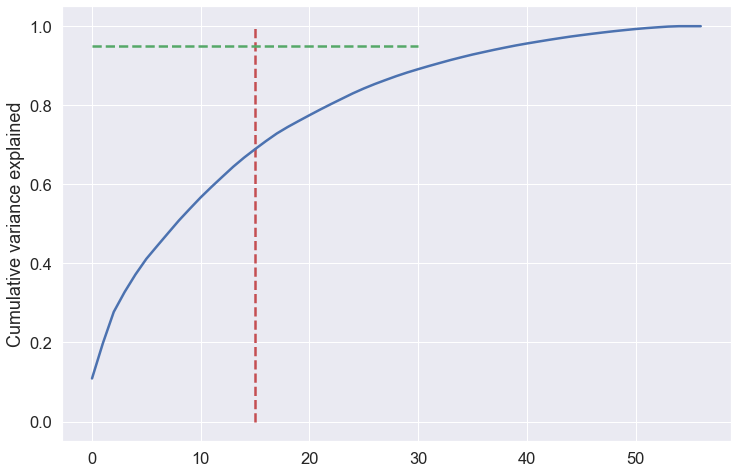

In [70]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

#### Perform PCA with 15 components

In [71]:
pca_final = IncrementalPCA(n_components=15)

In [72]:
df_train_pca = pca_final.fit_transform(X_tr)

In [73]:
df_train_pca.shape

(38576, 15)

In [74]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [75]:
corrmat.shape

(15, 15)

#### Plotting the heatmap of the corr matrix

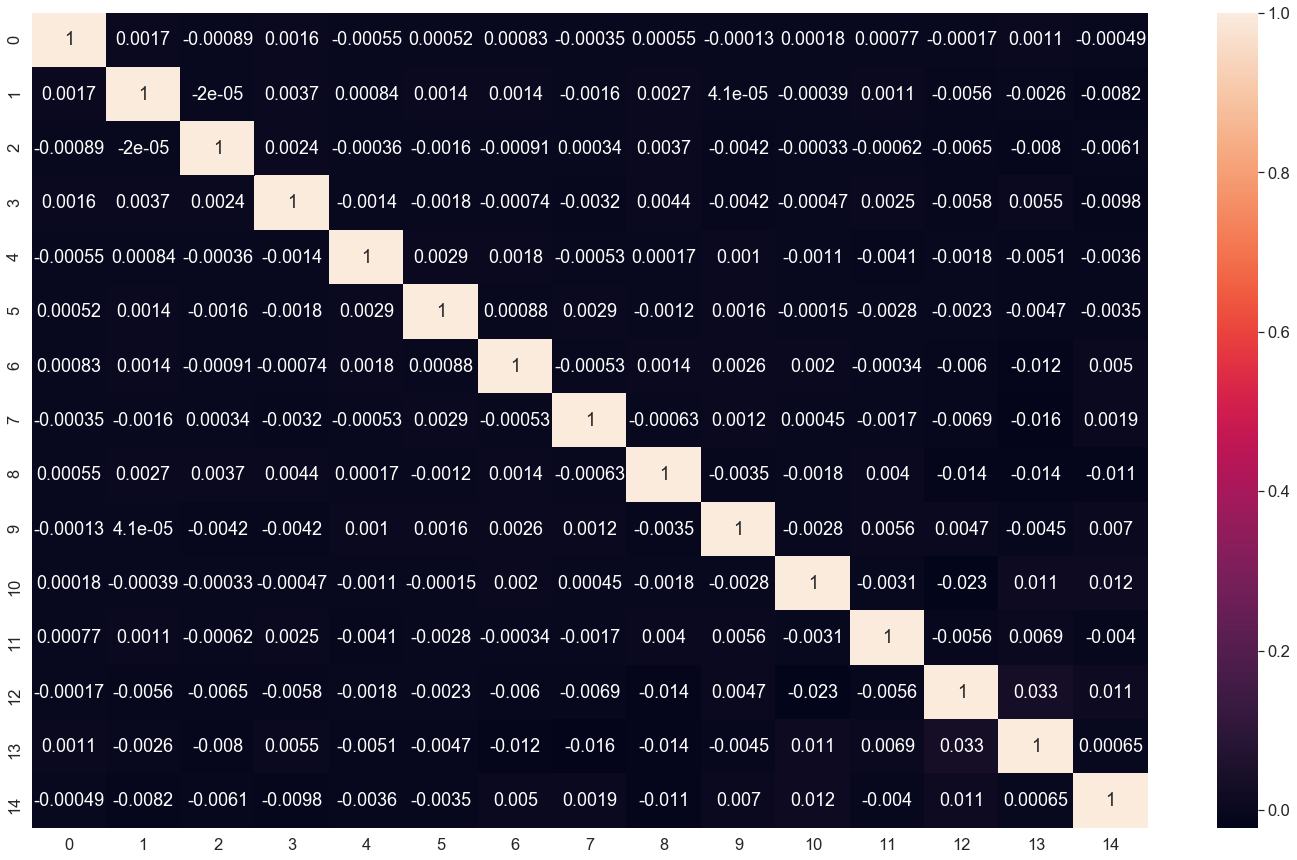

In [76]:
plt.figure(figsize=[25,15])
sns.heatmap(corrmat, annot=True)

#### Transformation on test dataset

In [77]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9001, 15)

#### Applying logistic regression on the data on our Principal components

In [78]:
learner_pca = LogisticRegression()

In [79]:
model_pca = learner_pca.fit(df_train_pca, y_tr)

#### Prediction

In [80]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [81]:
pred_probs_test[:,1]

array([0.79885834, 0.42497897, 0.00842973, ..., 0.13409642, 0.04811012,
       0.05352974])

In [82]:
df = pd.DataFrame(pred_probs_test[:,1],columns=['pred_prob'])

In [83]:
df.head()

,pred_prob
0,0.80
1,0.42
2,0.01
3,0.39
4,0.10


In [84]:
df['pred'] = df.pred_prob.map( lambda x: 1 if x > 0.5 else 0)

In [85]:
y_test = pd.DataFrame(y_test)

In [86]:
y_test.reset_index(inplace = True, drop = True)

In [87]:
y_test.head()

,churn,mobile_number
0,0,7000122708
1,0,7001503078
2,0,7002164007
3,0,7000407511
4,0,7001352228


In [88]:
y_pred_final = pd.concat([y_test,df],axis=1)

In [89]:
y_pred_final.head()

,churn,mobile_number,pred_prob,pred
0,0,7000122708,0.80,1
1,0,7001503078,0.42,0
2,0,7002164007,0.01,0
3,0,7000407511,0.39,0
4,0,7001352228,0.10,0


#### Accuracy

In [90]:
metrics.accuracy_score(y_pred_final.churn, y_pred_final.pred)

0.7836907010332186

#### Making it a little more unsupervised

In [91]:
pca_again = PCA(0.9)
df_train_pca2 = pca_again.fit_transform(X_tr)

df_train_pca2.shape

(38576, 33)

#### Following it up with a logistic regression model

In [92]:
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(df_train_pca2, y_tr)
df_test_pca2 = pca_again.transform(X_test)

df_test_pca2.shape

(9001, 33)

#### Prediction

In [93]:
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]

In [94]:
df = pd.DataFrame(pred_probs_test2,columns=['pred_prob'])

In [95]:
df.head()

,pred_prob
0,0.79
1,0.40
2,0.01
3,0.07
4,0.01


In [96]:
df['pred'] = df.pred_prob.map( lambda x: 1 if x > 0.5 else 0)

In [97]:
y_test = pd.DataFrame(y_test)

In [98]:
y_test.reset_index(inplace = True, drop = True)

In [99]:
y_test.head()

,churn,mobile_number
0,0,7000122708
1,0,7001503078
2,0,7002164007
3,0,7000407511
4,0,7001352228


In [100]:
y_pred_final = pd.concat([y_test,df],axis=1)

In [101]:
y_pred_final.head()

,churn,mobile_number,pred_prob,pred
0,0,7000122708,0.79,1
1,0,7001503078,0.40,0
2,0,7002164007,0.01,0
3,0,7000407511,0.07,0
4,0,7001352228,0.01,0


#### Confusion matrix

In [102]:
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred )
confusion

array([[6759, 1513],
       [ 145,  584]], dtype=int64)

In [103]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#### Sensitivity/Recall

In [104]:
round(TP / float(TP+FN),2)

0.8

#### Specificity

In [105]:
round(TN / float(TN+FP),2)

0.82

#### False postive rate - predicting converted when lead does not have converted

In [106]:
print(FP/ float(TN+FP))

0.18290618955512572


#### Positive predictive value/Precision

In [107]:
print (TP / float(TP+FP))

0.27849308536003814


#### Negative predictive value

In [108]:
print (TN / float(TN+ FN))

0.9789976825028969


#### Accuracy

In [109]:
metrics.accuracy_score(y_pred_final.churn, y_pred_final.pred)

0.8157982446394845

#### Model Evaluation

In [110]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

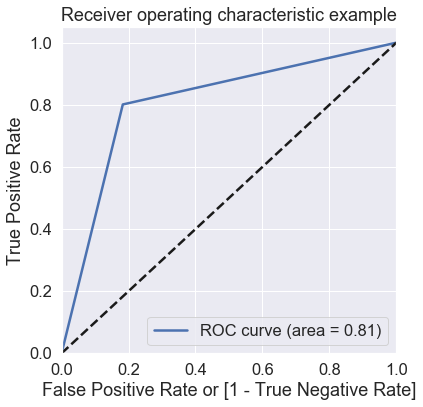

(array([0.        , 0.18290619, 1.        ]),
 array([0.        , 0.80109739, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [111]:
draw_roc(y_pred_final.churn, y_pred_final.pred)

## b) Decision Tree

#### create new Dataset for modeling

In [112]:
Telecom_df = data_highval_cust[:].copy()

#### Dropping tenure_range since we have AON MONTH already and columns are highly coorelated

In [113]:
Telecom_df.drop('tenure_range', axis=1, inplace=True)
#Telecom_df.drop('mobile_number', axis=1, inplace=True)

#### Fill NaN with 0

In [114]:
Telecom_df.fillna(0, inplace=True)

Telecom_df.head()

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,...,avg_total_rech_num_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,aon_mon
0,7000842753,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3.50,252.00,252.00,15.72,0.00,0.00,1.00,0.00,50.60,32.27
7,7000701601,3171.48,52.29,325.91,31.64,38.06,0.00,255.79,16.68,77.84,...,5.00,1185.00,0.00,0.00,0.00,0.00,0.00,0.00,19.06,26.73
8,7001524846,137.36,35.08,136.48,0.00,0.00,7.15,63.04,0.00,98.28,...,20.00,122.00,25.00,178.00,0.50,0.50,0.00,0.00,516.40,10.50
21,7002124215,637.76,85.14,983.39,0.00,0.00,0.00,129.74,0.00,938.79,...,24.00,50.00,25.00,0.00,0.00,0.00,0.00,0.00,0.00,24.00
23,7000887461,366.97,33.58,205.89,0.00,0.00,17.71,182.14,0.00,39.61,...,4.00,89.50,89.50,0.24,0.00,0.00,1.00,0.00,25.93,20.13


#### split into X and y

In [115]:
X = Telecom_df.drop(['churn','mobile_number'], axis=1)
y = Telecom_df[['churn','mobile_number']]

Telecom_df.drop(['churn','mobile_number'], axis=1, inplace=True)

#### Feature Scaling

In [116]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

#### Split in train & Test

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

#### Balancing DataSet using SMOTE

In [118]:
sm = SMOTE(random_state=42)
X_tr,y_tr = sm.fit_sample(X_train,y_train.churn)

#### Fitting the decision tree with default hyperparameters, apart from max_depth which is 5

In [119]:
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_tr,y_tr)

DecisionTreeClassifier(max_depth=5)

#### Prediction

In [120]:
y_pred = dt_default.predict(X_test)

In [121]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

#### Accuracy

In [122]:
print("Accuracy:",metrics.accuracy_score(y_test.churn, y_pred))

Accuracy: 0.8544606154871681


#### Confusion matrix

In [123]:
print(confusion_matrix(y_test.churn,y_pred))

[[7112 1160]
 [ 150  579]]


In [124]:
confusion= metrics.confusion_matrix(y_test.churn,y_pred)

In [125]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#### Sensitivity/Recall

In [126]:
round(TP / float(TP+FN),2)

0.79

#### Specificity

In [127]:
round(TN / float(TN+FP),2)

0.86

#### False postive rate - predicting converted when lead does not have converted

In [128]:
print(FP/ float(TN+FP))

0.1402321083172147


#### Positive predictive value/Precision

In [129]:
print (TP / float(TP+FP))

0.3329499712478436


#### Negative predictive value

In [130]:
print (TN / float(TN+ FN))

0.97934453318645


## c) Random Forest

#### create new Dataset for modeling

In [131]:
Telecom_df = data_highval_cust[:].copy()

#### Dropping tenure_range since we have AON MONTH already and columns are highly coorelated

In [132]:
Telecom_df.drop('tenure_range', axis=1, inplace=True)
#Telecom_df.drop('mobile_number', axis=1, inplace=True)

#### Fill NaN with 0

In [133]:
Telecom_df.fillna(0, inplace=True)

Telecom_df.head()

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,...,avg_total_rech_num_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,aon_mon
0,7000842753,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3.50,252.00,252.00,15.72,0.00,0.00,1.00,0.00,50.60,32.27
7,7000701601,3171.48,52.29,325.91,31.64,38.06,0.00,255.79,16.68,77.84,...,5.00,1185.00,0.00,0.00,0.00,0.00,0.00,0.00,19.06,26.73
8,7001524846,137.36,35.08,136.48,0.00,0.00,7.15,63.04,0.00,98.28,...,20.00,122.00,25.00,178.00,0.50,0.50,0.00,0.00,516.40,10.50
21,7002124215,637.76,85.14,983.39,0.00,0.00,0.00,129.74,0.00,938.79,...,24.00,50.00,25.00,0.00,0.00,0.00,0.00,0.00,0.00,24.00
23,7000887461,366.97,33.58,205.89,0.00,0.00,17.71,182.14,0.00,39.61,...,4.00,89.50,89.50,0.24,0.00,0.00,1.00,0.00,25.93,20.13


#### split into X and y

In [134]:
X = Telecom_df.drop(['churn','mobile_number'], axis=1)
y = Telecom_df[['churn','mobile_number']]

Telecom_df.drop(['churn','mobile_number'], axis=1, inplace=True)

#### Feature Scaling

In [135]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

#### Split in train & Test

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

#### Balancing DataSet using SMOTE

In [137]:
sm = SMOTE(random_state=42)
X_tr,y_tr = sm.fit_sample(X_train,y_train.churn)

#### Fitting the Random forest with max_depth = 10

In [138]:
model_rf = RandomForestClassifier(max_depth=10)
model_rf.fit(X_tr, y_tr)

RandomForestClassifier(max_depth=10)

#### Prediction

In [139]:
prediction_test = model_rf.predict(X_test)

#### Accuracy

In [140]:
print(metrics.accuracy_score(y_test.churn, prediction_test))

0.9104543939562271


#### Confusion matrix

In [141]:
print(confusion_matrix(y_test.churn,prediction_test))

[[7651  621]
 [ 185  544]]


In [142]:
confusion= metrics.confusion_matrix(y_test.churn,prediction_test)

In [143]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#### Sensitivity/Recall

In [144]:
round(TP / float(TP+FN),2)

0.75

#### Specificity

In [145]:
round(TN / float(TN+FP),2)

0.92

#### False postive rate - predicting converted when lead does not have converted

In [146]:
print(FP/ float(TN+FP))

0.0750725338491296


#### Positive predictive value/Precision

In [147]:
print (TP / float(TP+FP))

0.4669527896995708


#### Negative predictive value

In [148]:
print (TN / float(TN+ FN))

0.9763910158244002


#### Fitting the Random forest with max_depth = 5

In [149]:
model_rf = RandomForestClassifier(max_depth=5)
model_rf.fit(X_tr, y_tr)

RandomForestClassifier(max_depth=5)

#### Prediction

In [150]:
prediction_test = model_rf.predict(X_test)

#### Accuracy

In [151]:
print(metrics.accuracy_score(y_test.churn, prediction_test))

0.8849016775913787


#### Confusion matrix

In [152]:
print(confusion_matrix(y_test.churn,prediction_test))

[[7414  858]
 [ 178  551]]


In [153]:
confusion= metrics.confusion_matrix(y_test.churn,prediction_test)

In [154]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#### Sensitivity/Recall

In [155]:
round(TP / float(TP+FN),2)

0.76

#### Specificity

In [156]:
round(TN / float(TN+FP),2)

0.9

#### False postive rate - predicting converted when lead does not have converted

In [157]:
print(FP/ float(TN+FP))

0.10372340425531915


#### Positive predictive value/Precision

In [158]:
print (TP / float(TP+FP))

0.3910574875798439


#### Negative predictive value

In [159]:
print (TN / float(TN+ FN))

0.9765542676501581


In [160]:
model_rf.feature_importances_

array([0.07763003, 0.02468344, 0.03472229, 0.08131114, 0.08459151,
       0.00035291, 0.10352601, 0.00023946, 0.00907716, 0.00069098,
       0.00964046, 0.        , 0.17368604, 0.00576992, 0.00263609,
       0.05209415, 0.00521426, 0.00031241, 0.00072182, 0.04910658,
       0.06746741, 0.06754401, 0.02563021, 0.00911271, 0.01663036,
       0.00497193, 0.00122647, 0.01041022, 0.00398247, 0.00102391,
       0.00206014, 0.01777741, 0.01379072, 0.00210121, 0.00389753,
       0.00018379, 0.00611595, 0.00124654, 0.00054948, 0.00203469,
       0.00704257, 0.00258086, 0.00029996, 0.00052131, 0.00086126,
       0.00021575, 0.00093119, 0.00185757, 0.00181286, 0.00105843,
       0.00124566, 0.00381327, 0.00072031, 0.00077475, 0.00026873,
       0.00067481, 0.00155687])

### Important features using Random Forest as Accuracy and Sensitivity both are good

In [161]:
feature_imp = pd.Series(model_rf.feature_importances_).sort_values(ascending=False)
feature_imp

12   0.17
6    0.10
4    0.08
3    0.08
0    0.08
21   0.07
20   0.07
15   0.05
19   0.05
2    0.03
22   0.03
1    0.02
31   0.02
24   0.02
32   0.01
27   0.01
10   0.01
23   0.01
8    0.01
40   0.01
36   0.01
13   0.01
16   0.01
25   0.00
28   0.00
34   0.00
51   0.00
14   0.00
41   0.00
33   0.00
30   0.00
39   0.00
47   0.00
48   0.00
56   0.00
37   0.00
50   0.00
26   0.00
49   0.00
29   0.00
46   0.00
44   0.00
53   0.00
18   0.00
52   0.00
9    0.00
55   0.00
38   0.00
43   0.00
5    0.00
17   0.00
42   0.00
54   0.00
7    0.00
45   0.00
35   0.00
11   0.00
dtype: float64

Text(0.5, 1.0, 'Feature importance')

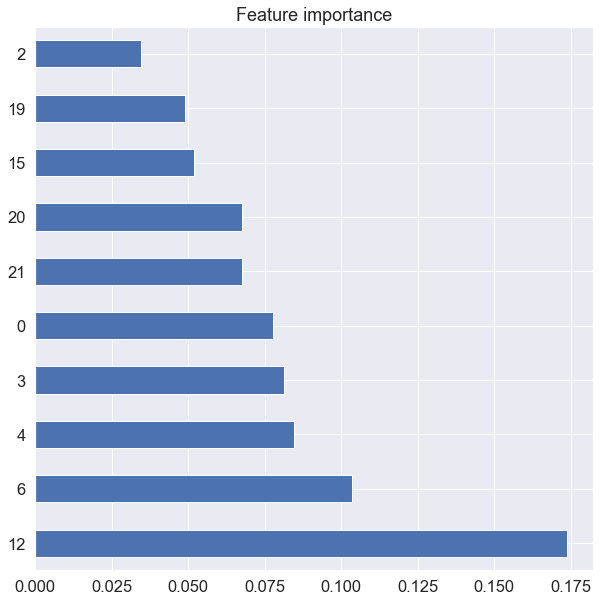

In [164]:
imp_coef = feature_imp.head(10)
plt.rcParams['figure.figsize'] = (10.0, 10)
imp_coef.plot(kind = "barh")
plt.title("Feature importance")

# Summary : Telecom Churn 


- Very Less Amount of High Value customers are churning 
- Std Outgoing Calls and Revenue Per Customer are strong indicators of Churn
- Behaviour of Volume Based Cost is not a strong indicator of Churn
- Max Recharge Amount could be a good Churn Indicator
- Random Forest is the best method to Predict Churn , other models too do a fair job
- Behaviour is 8 Month can be the base of Churn Analysis
- Local Incoming and Outgoing Calls for 8th Month and Average Revenue in 8th Month are strong indicators of Churn Behaviour